In [10]:
%load_ext autoreload
%autoreload 2

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../scripts")
import models
import pickle
from Bio import SeqIO
#import main

## Test `InteractionMatrix`

In [31]:
file = open("../data/GM12878_5k/loops_0.pickle", "rb")

In [42]:
matrices = []
for i in range(12):
    identifier, test_item = pickle.load(file)
    matrix = models.InteractionMatrix(identifier, test_item)
    matrices.append(matrix)

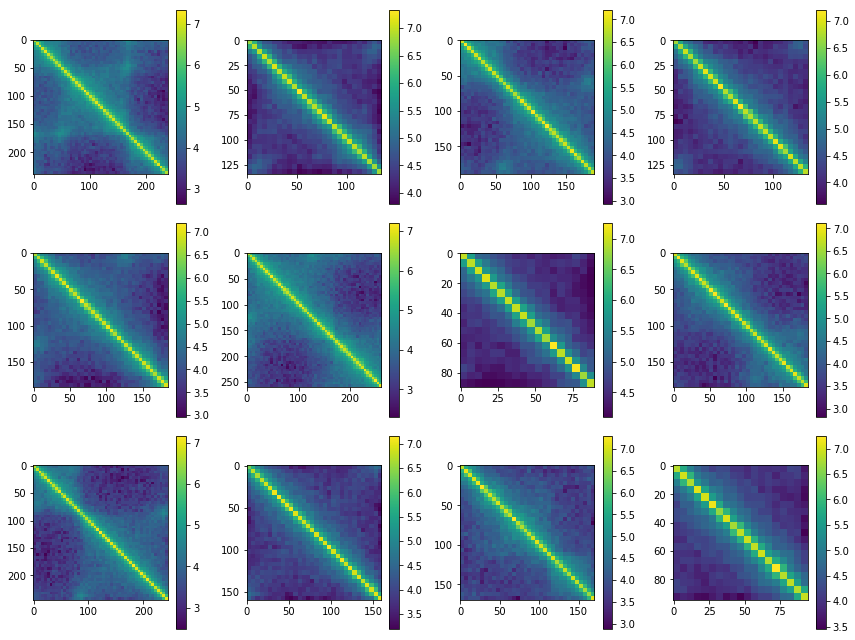

In [48]:
resolution = 1000

plt.figure(figsize=(12, 9))
for i, matrix in enumerate(matrices):
    plt.subplot(3, 4, i + 1)
    r = matrix.range()
    interpolated = np.zeros(((r[1] - r[0]) // resolution, (r[1] - r[0]) // resolution))
    for x in range(interpolated.shape[0]):
        for y in range(interpolated.shape[1]):
            interpolated[x,y] = matrix.value_at(x * resolution + r[0], y * resolution + r[0])

    plt.imshow(np.log(1 + interpolated))
    plt.colorbar()
plt.tight_layout()
plt.show()

In [47]:
file.close()

## Test `Sequence`

In [53]:
seq_records = SeqIO.parse("../data/loop_sequences_GM12878.fasta", "fasta")

In [54]:
histone_file = open("../data/epigenomic_tracks/GM12878.pickle", "rb")
histone_mods = []
for i, record in enumerate(seq_records):
    identifier, h_mods = pickle.load(histone_file)
    histone_mods.append(models.Sequence(identifier, str(record.seq), h_mods))
    if i == 12:
        break

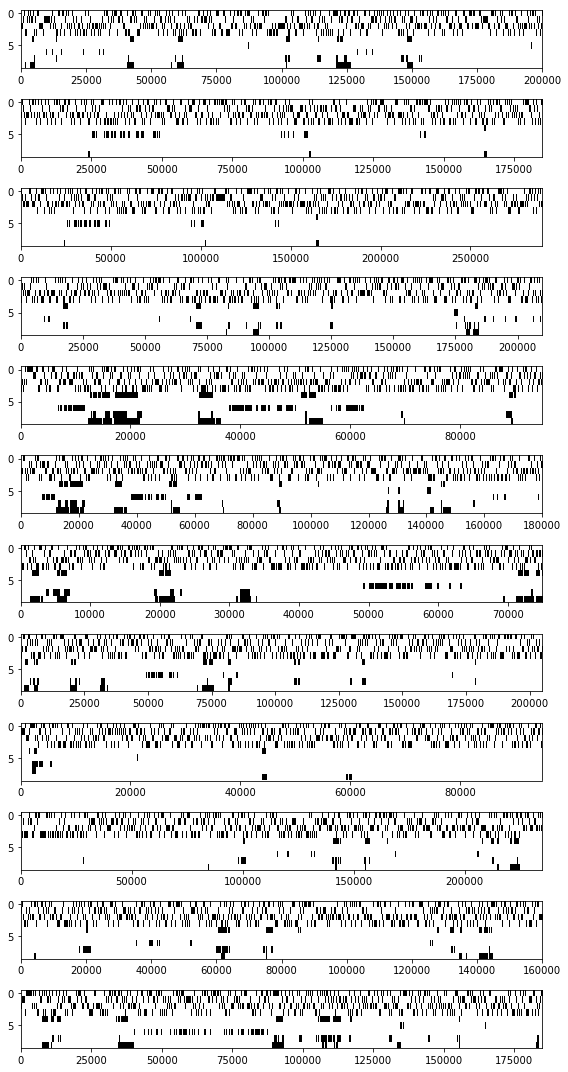

In [65]:
plt.figure(figsize=(8, 15))
for i in range(12):
    plt.subplot(12, 1, i + 1)
    mat = histone_mods[i].to_array() # Produces numpy arrays where each column is a feature vector
    plt.imshow(mat, cmap='Greys', aspect='auto')
    
plt.tight_layout()
plt.show()